 Build a logistic regression model for Student Score Dataset.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())



   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
df.shape


(1000, 8)

In [5]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df["mean_Score"] = ((df["math score"]+df["reading score"]+df["writing score"])/3).round()

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [7]:
df['gender'].value_counts()


female    518
male      482
Name: gender, dtype: int64

In [9]:

df['gender'] = lc.fit_transform(df['gender'])
df['race/ethnicity'] = lc.fit_transform(df['race/ethnicity'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_Score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


In [12]:
df['test preparation course'].value_counts()



1    642
0    358
Name: test preparation course, dtype: int64

In [25]:
df = df.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_Score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [27]:

y = df['mean_Score']
x = df.drop(['mean_Score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [33]:
model = LogisticRegression(solver='liblinear', random_state=0)
print(model)

LogisticRegression(random_state=0, solver='liblinear')


In [34]:
model.fit(x_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [35]:
predictions = model.predict(x_test)
print(predictions)


[69. 56. 56. 59. 73. 76. 67. 71. 76. 69. 73. 54. 69. 71. 76. 54. 68. 74.
 62. 49. 73. 69. 67. 68. 71. 56. 55. 68. 54. 74. 59. 76. 67. 73. 76. 71.
 74. 68. 92. 69. 73. 56. 68. 75. 65. 92. 73. 65. 74. 54. 71. 55. 65. 68.
 71. 69. 69. 69. 76. 69. 71. 74. 76. 71. 73. 58. 69. 73. 76. 68. 71. 71.
 71. 75. 71. 71. 69. 69. 73. 73. 76. 69. 87. 73. 79. 69. 71. 92. 76. 54.
 54. 73. 54. 55. 69. 68. 59. 54. 56. 68. 76. 71. 61. 50. 71. 75. 76. 65.
 69. 79. 74. 75. 69. 59. 74. 74. 76. 59. 56. 76. 69. 65. 74. 68. 71. 76.
 73. 76. 76. 74. 79. 73. 59. 69. 76. 69. 71. 69. 69. 73. 71. 73. 73. 68.
 65. 59. 59. 59. 76. 69. 68. 74. 74. 71. 74. 69. 71. 73. 69. 68. 74. 69.
 59. 71. 76. 73. 76. 68. 69. 73. 69. 71. 65. 75. 73. 69. 69. 73. 87. 73.
 68. 65. 49. 68. 76. 69. 92. 87. 54. 68. 68. 48. 58. 67. 59. 59. 76. 73.
 92. 61.]


In [36]:
difference = abs(predictions - y_test)
print(difference)

993     0.0
859    21.0
298    11.0
553     9.0
672     1.0
       ... 
679     2.0
722     8.0
215     8.0
653    22.0
150     5.0
Name: mean_Score, Length: 200, dtype: float64


In [37]:
difference.mean()

11.03

([<matplotlib.patches.Wedge at 0x1e4a2e20280>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

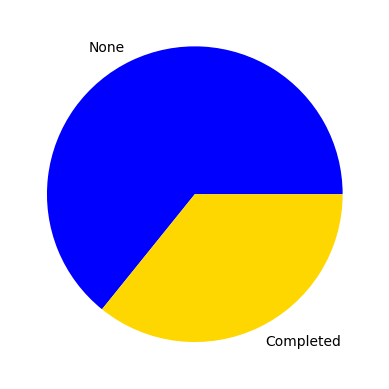

In [38]:
labels = ['None', 'Completed']
colors = ['blue', 'gold']
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = colors)

<AxesSubplot:xlabel='gender', ylabel='count'>

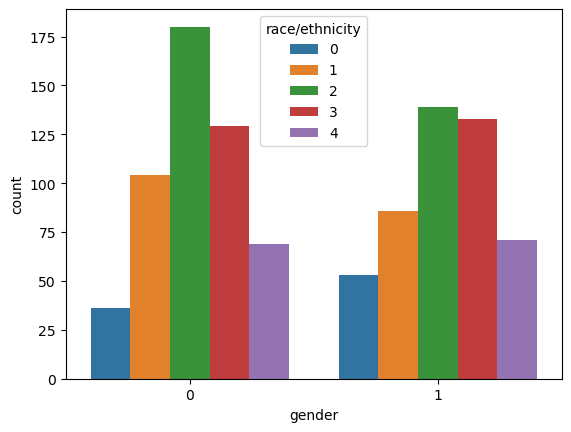

In [39]:
sns.countplot(x = df['gender'], hue = df['race/ethnicity'])

<Figure size 1200x600 with 0 Axes>

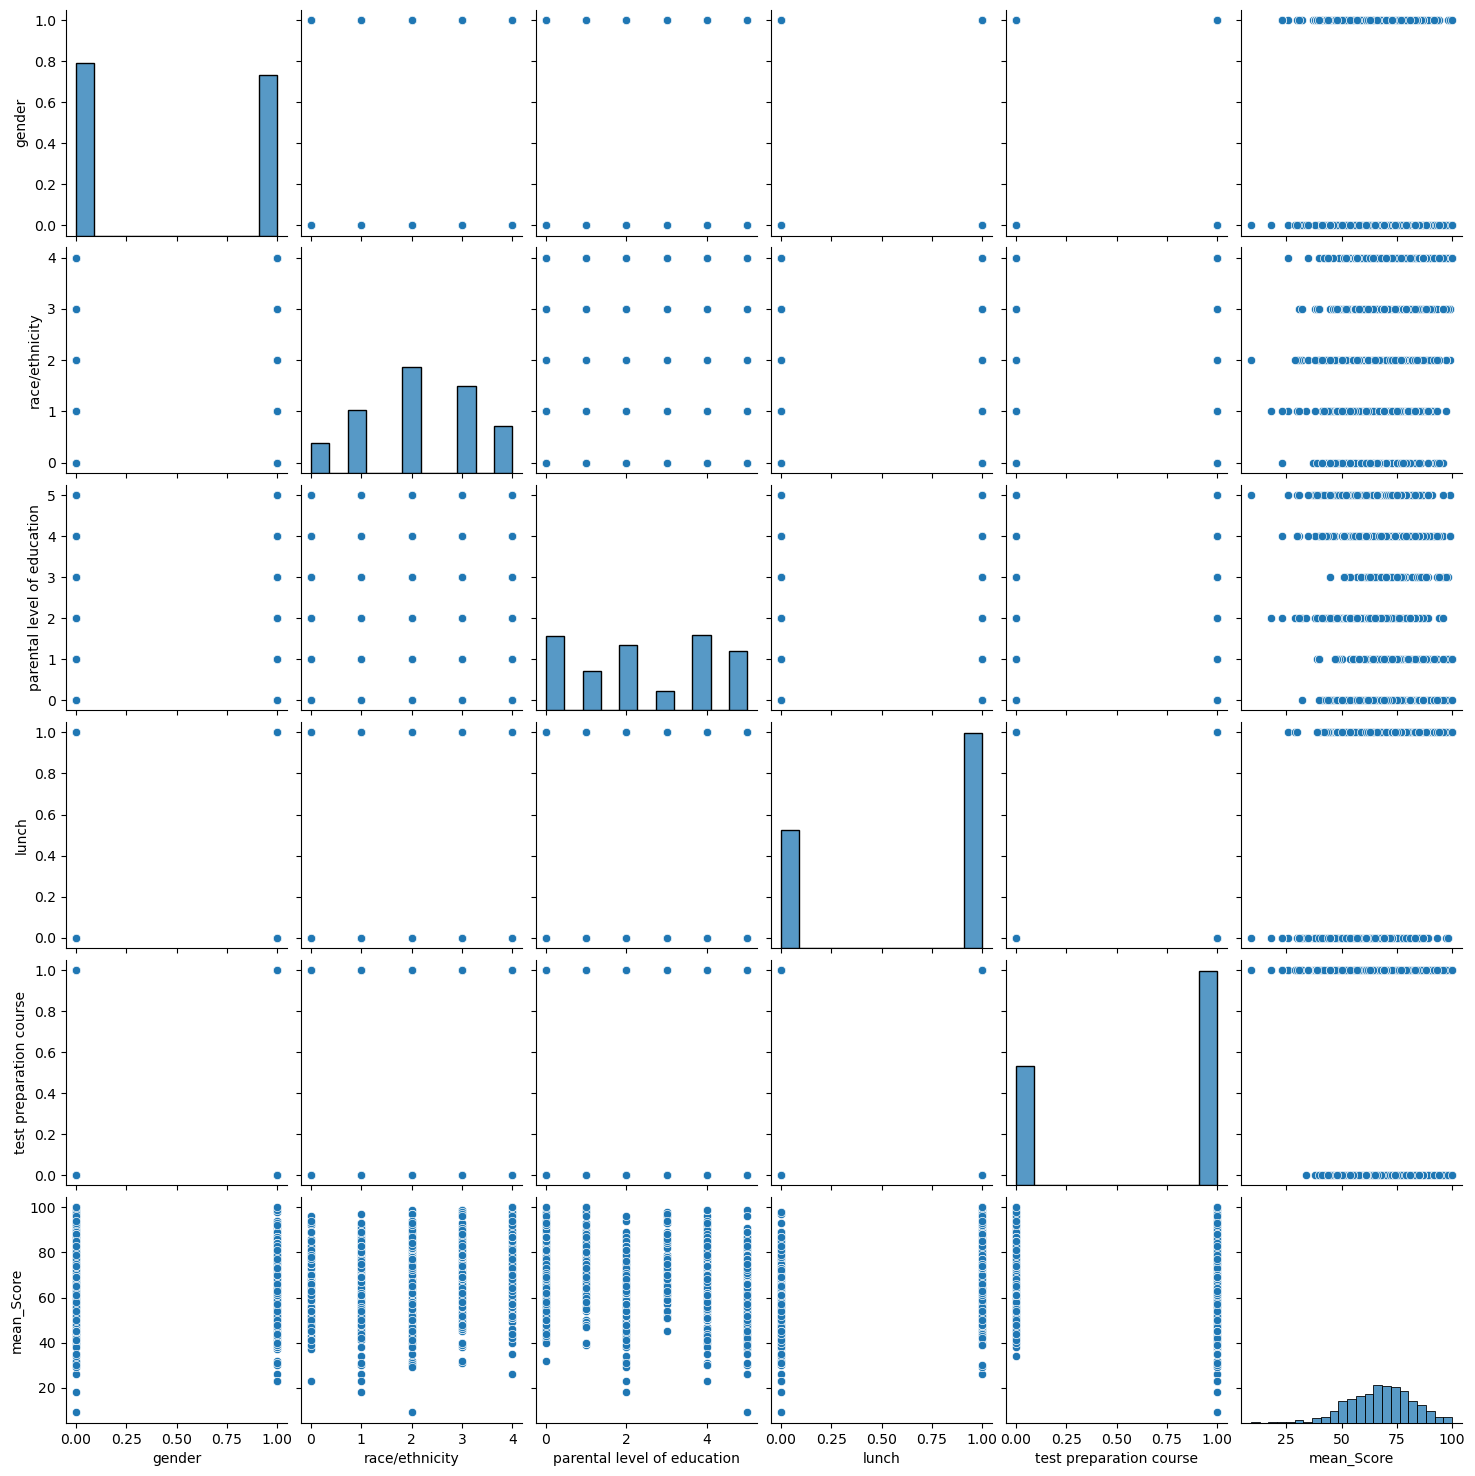

In [40]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

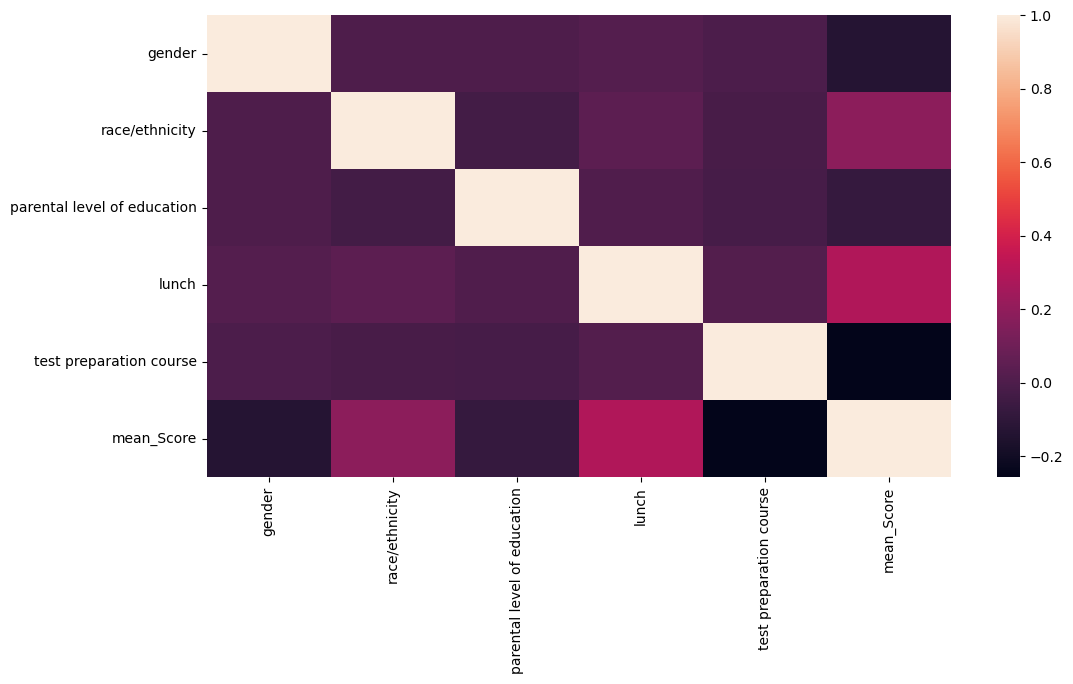

In [41]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()
